In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import pandas as pd
import tensorflow as tf
import math
import warnings
warnings.filterwarnings("ignore")
from scipy.io import loadmat

In [303]:
data_at7 = loadmat('Données/data_at7.mat') 

temps=data_at7['temps']; T=data_at7['T'].T[:,0]; coef_puis=data_at7['coef_puis'].T[:,0]

# T=pd.DataFrame(T).T
# temps=pd.DataFrame(temps).T
# coef_puis=pd.DataFrame(coef_puis).T

variables= {
    'T' : T,
    'coef_puis' :coef_puis}
    
dfT = pd.DataFrame(T,columns = ['T']) 
dfCoef_puis = pd.DataFrame(coef_puis,columns = ['coef_puis']) 




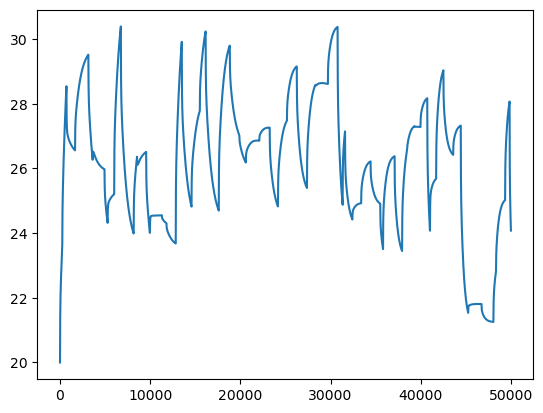

In [304]:

data=pd.concat([dfT,dfCoef_puis], axis=1)
y=data['T']
y=y.to_numpy()
y=y.reshape((y.shape[0],1))

X=data['coef_puis']
X=X.to_numpy()
X=X.reshape((X.shape[0],1))


plt.plot(y)

In [305]:
def Input(t,na,nb,T,P):
    
    
    X=[]
    for j in range(1,nb+1):

        X = np.append(X,P[t-j])

    for i in range(1,na+1):

        X = np.append(X,-T[t-i])

    return X

In [306]:

t=100
T=y#[1:na,:]
P=X#[1:t-na,:]
na=50
nb=60
input=Input(t,na,nb,T,P)



array([  0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
         0.5       ,   0.5       ,   0.5       ,   0.5       ,
       -22.51186935, -22.50290039, -22.49387847, -22.48

In [307]:
def y_chap(t,na,nb,T,P):

    shi=Input(t,na,nb,T,P)
           
    #parametres = initialisation([na + nb,32,1])
    
    theta = np.random.normal(size=na+nb)

    y_chap = theta.dot(shi) + np.random.normal(size=1)
    
    return y_chap

In [308]:
y_chap(t,na,nb,T,P)

array([11.66063248])

In [309]:
dataY=[]

for t in range(1,500):
   y = y_chap(t,na,nb,T,P)
   
   dataY = np.append(dataY,y)
    


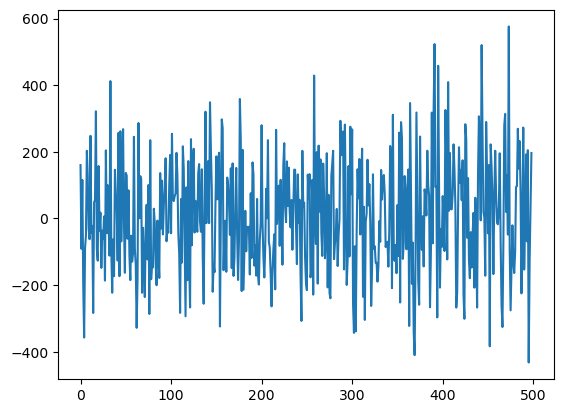

In [310]:
t = np.arange(1,500)
plt.plot(dataY)